# Data Exploration IPython Notebook

In [1]:
# last modified by: lindali
# last modified: 2/12/16

In [12]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [3]:
# complaints (311)
complaints = pd.read_csv('Housing_Maintenance_Code_Complaints.csv', parse_dates=['ReceivedDate', 'StatusDate'])

In [4]:
print complaints.dtypes

ComplaintID                int64
BuildingID                 int64
BoroughID                  int64
Borough                   object
HouseNumber               object
StreetName                object
Zip                      float64
Block                      int64
Lot                        int64
Apartment                 object
CommunityBoard             int64
ReceivedDate      datetime64[ns]
StatusID                   int64
Status                    object
StatusDate        datetime64[ns]
dtype: object


In [5]:
print complaints.head()

   ComplaintID  BuildingID  BoroughID    Borough HouseNumber  \
0      6960137        3418          1  MANHATTAN        1989   
1      6960832        3512          1  MANHATTAN        2267   
2      6946867        5318          1  MANHATTAN         778   
3      6966946        5608          1  MANHATTAN        1640   
4      6963755        7851          1  MANHATTAN        2586   

                StreetName    Zip  Block  Lot Apartment  CommunityBoard  \
0  ADAM C POWELL BOULEVARD  10026   1904    4       12D              10   
1  ADAM C POWELL BOULEVARD  10030   1918    4        3B              10   
2                11 AVENUE  10019   1083    1        4P               4   
3         AMSTERDAM AVENUE  10031   2073   29        5A               9   
4                 BROADWAY  10025   1869   44        2B               7   

  ReceivedDate  StatusID Status StatusDate  
0   2014-07-07         2  CLOSE 2014-07-29  
1   2014-07-08         2  CLOSE 2014-07-12  
2   2014-06-19         2  CLO

In [6]:
# violations  (LL selected columns to reduce data size)
violations = pd.read_csv('Violations_2015.csv', parse_dates=['InspectionDate']) # violations

In [7]:
print len(violations)

577979


In [8]:
print violations.head()

   Unnamed: 0  ViolationID  BuildingID  RegistrationID  BoroID       Boro  \
0      393664     10506902          14          115401       1  MANHATTAN   
1      393665     10506854          14          115401       1  MANHATTAN   
2      393666     10506855          14          115401       1  MANHATTAN   
3      393669     10506853          14          115401       1  MANHATTAN   
4      393671     10501718          30          102324       1  MANHATTAN   

  HouseNumber LowHouseNumber HighHouseNumber StreetName  StreetCode    Zip  \
0        1058           1058            1064   1 AVENUE       10010  10022   
1        1058           1058            1064   1 AVENUE       10010  10022   
2        1058           1058            1064   1 AVENUE       10010  10022   
3        1058           1058            1064   1 AVENUE       10010  10022   
4        1097           1097            1097   1 AVENUE       10010  10065   

  Apartment Story  Block  Lot Class InspectionDate ApprovedDate  Ord

In [17]:
# 1. what data can we find on buildings (year built, material, type, etc.)
# 2. at what level is this data provided (bbl, bin, address?)
# 3. how can we tie this to the complaints/violations data (bbl, possibly bin (found a file called Buildings_Subject_to_HPD_Jurisdiction.csv))

## mapping count of violations per zipcode

In [84]:
#zip code json file 
zipcode = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson') 

In [85]:
zipcode.head(1)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.8744,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372


In [130]:
violations = violations.rename(columns={'Zip': 'zipcode'})
zipcor = zipcor.rename(columns = {'postalCode' : 'zipcode'})
violations['zipcode'] = violations['zipcode'].astype(float)
zipcor['zipcode'] = zipcor['zipcode'].astype(float)

In [132]:
violationcount = violations.groupby('zipcode').count()
violationcount['zipcode'] = violationcount.index
violationcount.head(2)

,Unnamed: 0,ViolationID,BuildingID,RegistrationID,BoroID,Boro,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,StreetCode,Apartment,Story,Block,Lot,Class,InspectionDate,ApprovedDate,OrderNumber,zipcode
zipcode,,,,,,,,,,,,,,,,,,,,
2011,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,2011
10001,687,687,687,687,687,687,687,687,687,687,687,305,486,687,687,687,687,687,687,10001


,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,...,StreetName,StreetCode,Apartment,Story,Block,Lot,Class,InspectionDate,ApprovedDate,OrderNumber
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.8744,20624.692317,Queens,...,2325,2325,1628,1835,2325,2325,2325,2325,2325,2325
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.9139,23002.816039,Queens,...,67,67,46,53,67,67,67,67,67,67


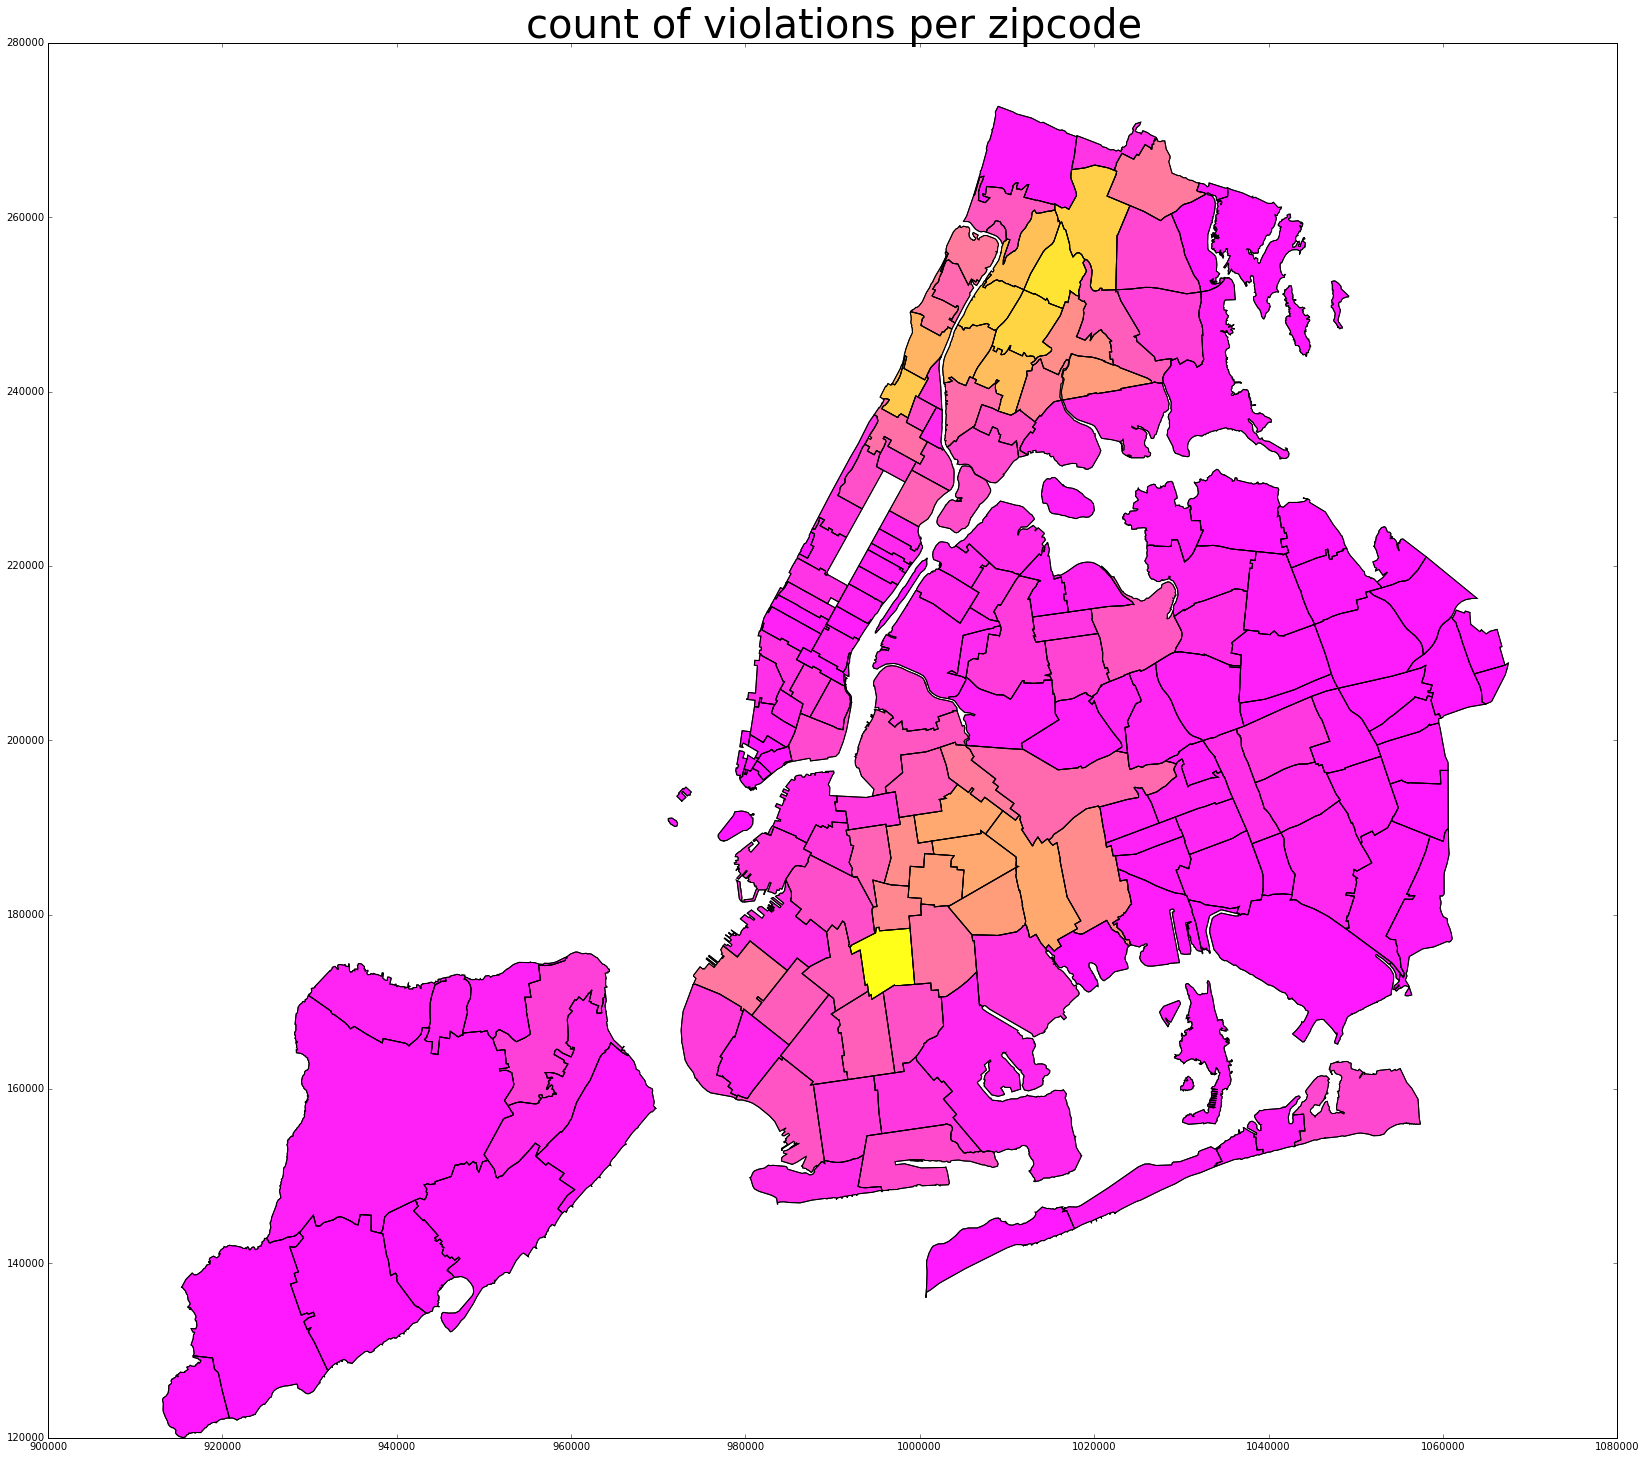

In [138]:
#visualizatoin of count of visualtizations 
plt.figure(figsize=(30,25))
violationzip.plot(column ='Boro',colormap='spring', alpha=0.9)
plt.title('count of violations per zipcode',fontsize=40)

# next step= visualize per capita in every zip 


## mapping count of complaints per zipcode


In [129]:
complaints = complaints.rename(columns={'Zip': 'zipcode'})
complaintscount = complaints.groupby('zipcode').count()
complaintscount.head()

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
zipcode,,,,,,,,,,,,,,
10001,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181
10002,3626,3626,3626,3626,3626,3626,3626,3626,3625,3626,3626,3626,3626,3626
10003,3201,3201,3201,3201,3201,3201,3201,3201,3201,3201,3201,3201,3201,3201
10004,25,25,25,25,25,25,25,25,25,25,25,25,25,25
10005,31,31,31,31,31,31,31,31,31,31,31,31,31,31


In [134]:
complaintscount['zipcode'] = complaintscount.index

In [135]:
complaintszip = pd.merge (zipcor,complaintscount,  how='inner', on=['zipcode'])
complaintszip.head(2)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,...,HouseNumber,StreetName,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.8744,20624.692317,Queens,...,2769,2769,2769,2769,2768,2769,2769,2769,2769,2769
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.9139,23002.816039,Queens,...,102,102,102,102,102,102,102,102,102,102


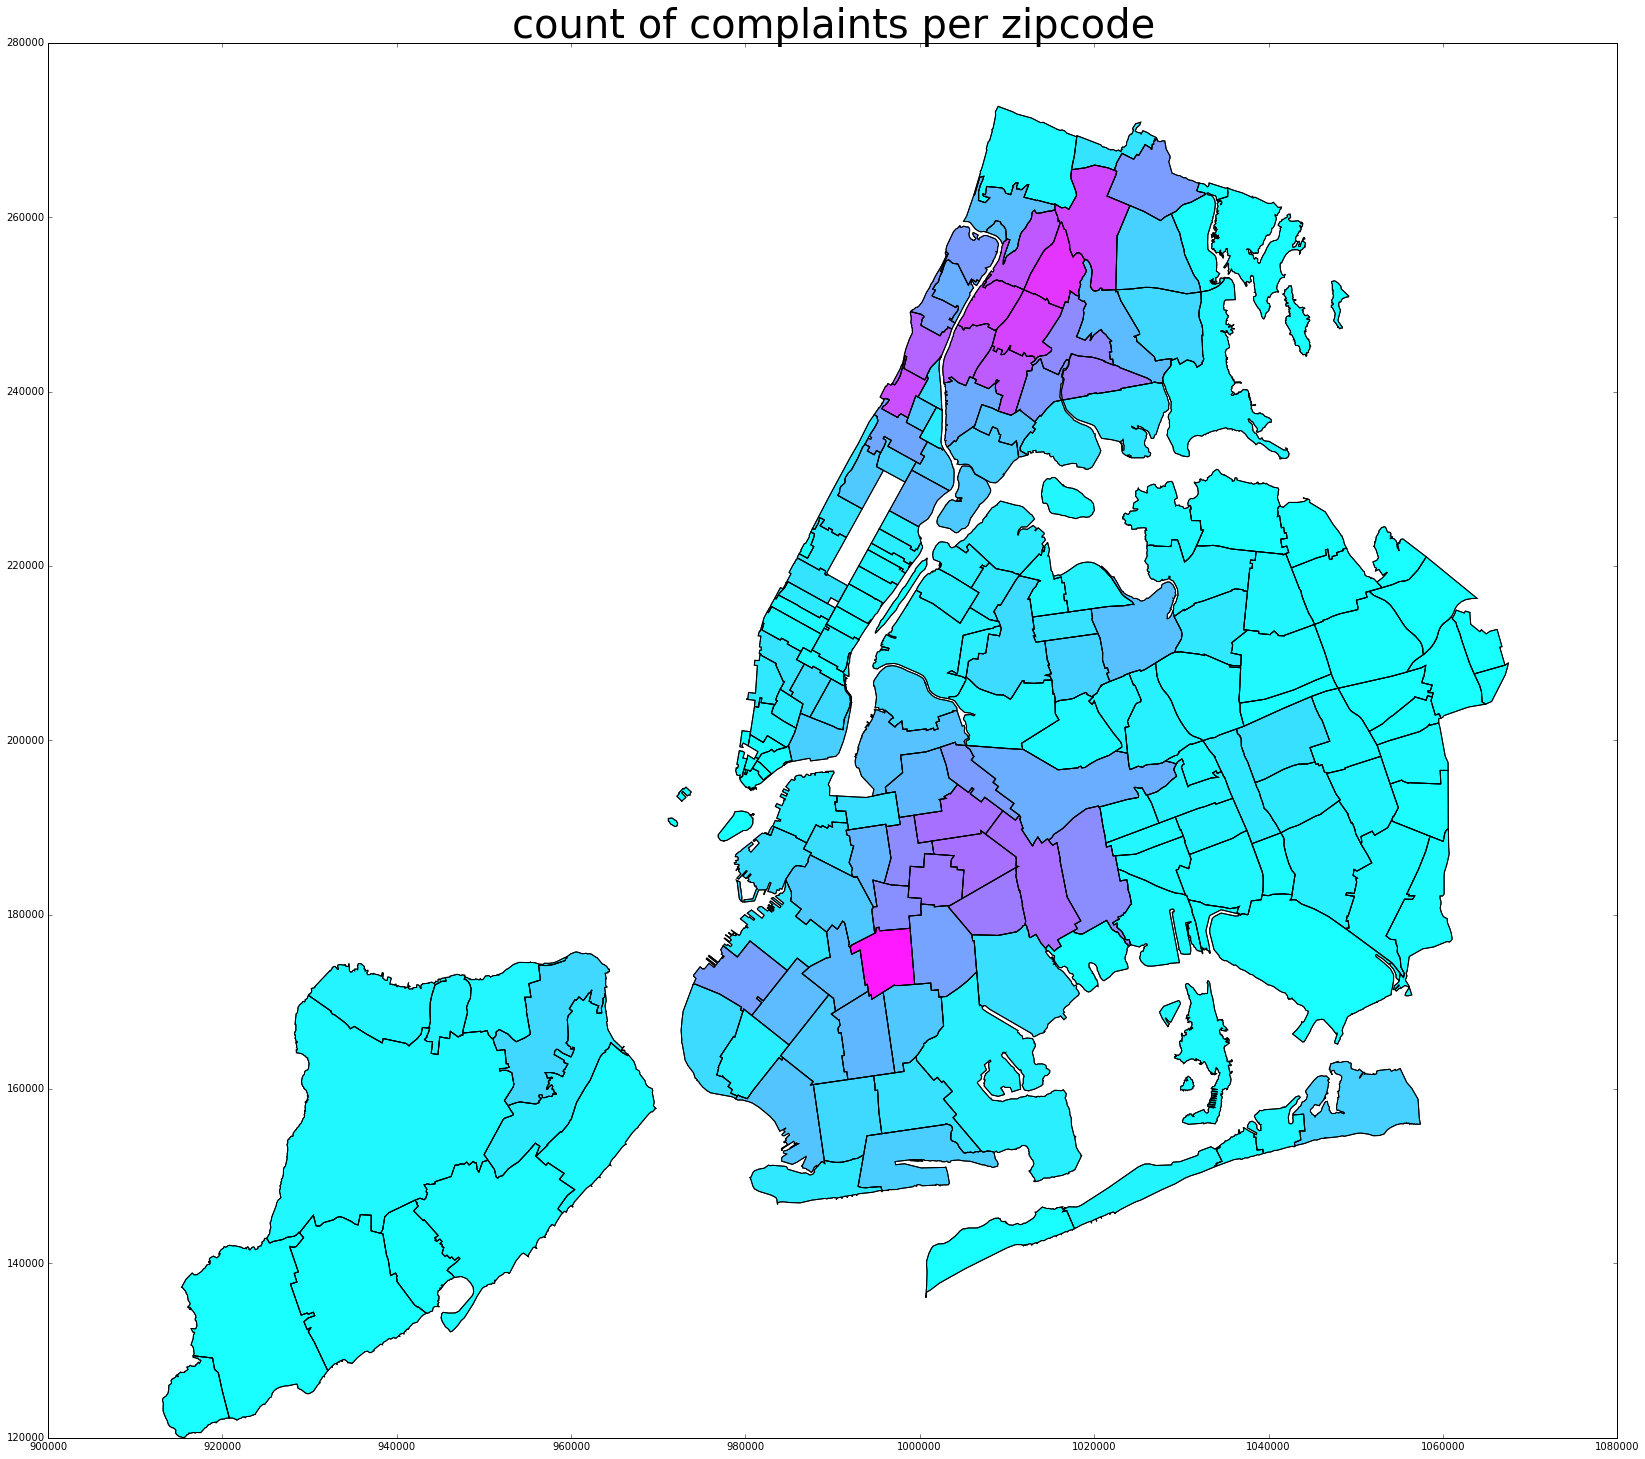

In [139]:
plt.figure(figsize=(30,25))
violationzip.plot(column ='Lot',colormap='cool', alpha=0.9)
plt.title('count of complaints per zipcode',fontsize=40)


In [182]:
# still working on plotting difrrence in violations / complaints per zip 

In [177]:
violationszip['zipcode'] = violationszip['zipcode'].astype(float)
complaintszip['zipcode'] = complaintszip['zipcode'].astype(float)

viol_compla_zip = pd.merge(violationszip,complaintszip,how='inner', on=['zipcode'] )



In [178]:
viol_compla_zip.head(10)

,@id_x,BLDGpostalCode_x,CTY_FIPS_x,OBJECTID_x,PO_NAME_x,STATE_x,ST_FIPS_x,Shape_Area_x,Shape_Leng_x,borough_x,...,HouseNumber_y,StreetName_y,Block_y,Lot_y,Apartment_y,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.87440,20624.692317,Queens,...,2769,2769,2769,2769,2768,2769,2769,2769,2769,2769
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.91390,23002.816039,Queens,...,102,102,102,102,102,102,102,102,102,102
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.41234,15749.161511,Queens,...,13,13,13,13,13,13,13,13,13,13
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.05770,35932.810639,Queens,...,82,82,82,82,82,82,82,82,82,82
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.59430,38693.565676,Queens,...,354,354,354,354,354,354,354,354,354,354
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,42659399.89820,33755.870988,Queens,...,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9155180.26263,13594.924549,Queens,...,21,21,21,21,21,21,21,21,21,21
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,55587771.83500,36277.076839,Queens,...,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,39568339.27480,31231.968593,Queens,...,504,504,504,504,504,504,504,504,504,504
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,25203458.86890,26323.994393,Queens,...,2792,2792,2792,2792,2792,2792,2792,2792,2792,2792


In [179]:
#diffrence count

viol_compla_zip['Boro'] = violationszip['Boro'].astype(float)
viol_compla_zip['ReceivedDate'] = viol_compla_zip['ReceivedDate'].astype(float)
viol_compla_zip['v_c_difference'] = (viol_compla_zip['Boro']-viol_compla_zip['ReceivedDate']).astype(float)
viol_compla_zip['v_c_difference'] = viol_compla_zip['v_c_difference'].astype(float)

is both violations and complaints for the same period of time? 

In [180]:

viol_compla_zip.Boro

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
199   NaN
200   NaN
201   NaN
202   NaN
203   NaN
204   NaN
205   NaN
206   NaN
207   NaN
208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
225   NaN
226   NaN
227   NaN
228   NaN
Name: Boro, dtype: float64